<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/attrition.png?raw=true" width=800 align="left"/>

# 실습 내용

- 다양한 알고리즘으로 성능이 최적화된 모델을 만듭니다.
- 성능이 좋을 것으로 예상되는 모델을 선정해 평가를 진행합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/Attrition_simple2.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

**데이터 설명**

- **Attrition: 이직 여부 (1: 이직, 0: 잔류)**
- Age: 나이
- DistanceFromHome: 집-직장 거리 (단위: 마일)
- EmployeeNumber: 사번
- Gender: 성별 (Male, Female)
- JobSatisfaction: 직무 만족도(1: Low, 2: Medium, 3: High, 4: Very High)
- MaritalStatus: 결혼 상태 (Single, Married, Divorced)
- MonthlyIncome: 월급 (단위: 달러)
- OverTime: 야근 여부 (Yes, No)
- PercentSalaryHike: 전년 대비 급여 인상율(단위: %)
- TotalWorkingYears: 총 경력 연수

In [3]:
# 데이터 살펴보기
data.head()

,Attrition,Age,DistanceFromHome,EmployeeNumber,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,817,Male,3,Married,11691,No,11,14
1,0,35,18,1412,Male,4,Single,9362,No,11,10
2,0,42,6,1911,Male,1,Married,13348,No,13,18
3,0,46,2,1204,Female,1,Married,17048,No,23,28
4,1,22,4,593,Male,3,Single,3894,No,16,4


In [4]:
# 기술통계 확인
data.describe()

,Attrition,Age,DistanceFromHome,EmployeeNumber,JobSatisfaction,MonthlyIncome,PercentSalaryHike,TotalWorkingYears
count,1196.000000,1196.00000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000
mean,0.163043,36.94398,9.258361,1035.629599,2.716555,6520.104515,15.251672,11.330268
std,0.369560,9.09270,8.166016,604.340130,1.110962,4665.902253,3.625946,7.823821
min,0.000000,18.00000,1.000000,1.000000,1.000000,1009.000000,11.000000,0.000000
25%,0.000000,30.00000,2.000000,507.750000,2.000000,2928.250000,12.000000,6.000000
50%,0.000000,36.00000,7.000000,1028.000000,3.000000,4973.500000,14.000000,10.000000
75%,0.000000,43.00000,14.000000,1581.250000,4.000000,8420.500000,18.000000,15.000000
max,1.000000,60.00000,29.000000,2068.000000,4.000000,19999.000000,25.000000,40.000000


In [5]:
# 변수 관련 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Attrition          1196 non-null   int64 
 1   Age                1196 non-null   int64 
 2   DistanceFromHome   1196 non-null   int64 
 3   EmployeeNumber     1196 non-null   int64 
 4   Gender             1196 non-null   object
 5   JobSatisfaction    1196 non-null   int64 
 6   MaritalStatus      1196 non-null   object
 7   MonthlyIncome      1196 non-null   int64 
 8   OverTime           1196 non-null   object
 9   PercentSalaryHike  1196 non-null   int64 
 10  TotalWorkingYears  1196 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 102.9+ KB


In [6]:
# 상관관계 
data.corr(numeric_only=True).style.background_gradient()

,Attrition,Age,DistanceFromHome,EmployeeNumber,JobSatisfaction,MonthlyIncome,PercentSalaryHike,TotalWorkingYears
Attrition,1.000000,-0.167866,0.081973,-0.008707,-0.078936,-0.163572,-0.000048,-0.182162
Age,-0.167866,1.000000,-0.010917,-0.023786,-0.012425,0.490107,-0.008303,0.674331
DistanceFromHome,0.081973,-0.010917,1.000000,0.054948,-0.021623,-0.012803,0.052348,0.002606
EmployeeNumber,-0.008707,-0.023786,0.054948,1.000000,-0.022863,-0.014032,-0.009514,-0.016317
JobSatisfaction,-0.078936,-0.012425,-0.021623,-0.022863,1.000000,-0.025082,0.030811,-0.039380
MonthlyIncome,-0.163572,0.490107,-0.012803,-0.014032,-0.025082,1.000000,-0.021334,0.768437
PercentSalaryHike,-0.000048,-0.008303,0.052348,-0.009514,0.030811,-0.021334,1.000000,-0.021988
TotalWorkingYears,-0.182162,0.674331,0.002606,-0.016317,-0.039380,0.768437,-0.021988,1.000000


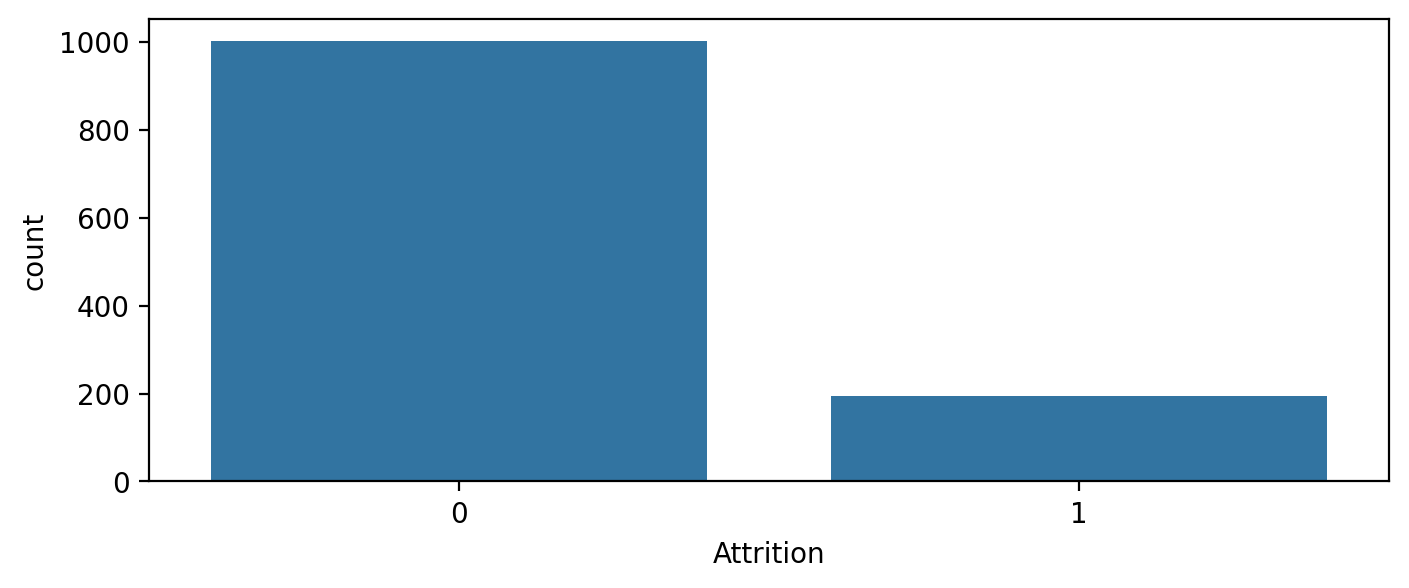

In [7]:
# Target 비율
plt.figure(figsize=(8, 3))
sns.countplot(x=data['Attrition'])
plt.show()

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) 변수 제거**

In [8]:
# 변수제거: EmployeeNumber
drop_cols = ['EmployeeNumber']
data.drop(columns=drop_cols, inplace=True)

# 확인
data.head()

,Attrition,Age,DistanceFromHome,Gender,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike,TotalWorkingYears
0,0,33,7,Male,3,Married,11691,No,11,14
1,0,35,18,Male,4,Single,9362,No,11,10
2,0,42,6,Male,1,Married,13348,No,13,18
3,0,46,2,Female,1,Married,17048,No,23,28
4,1,22,4,Male,3,Single,3894,No,16,4


**2) x, y 분리**

In [9]:
# x, y 분리
target = 'Attrition'
x = data.drop(columns=target)
y = data.loc[:, target]

**2) 가변수화**

In [10]:
# 가변수화
dumm_cols = ['Gender', 'JobSatisfaction', 'MaritalStatus', 'OverTime']
x = pd.get_dummies(x, columns=dumm_cols, drop_first=True, dtype=int)

# 확인
x.head()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,Gender_Male,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,33,7,11691,11,14,1,0,1,0,1,0,0
1,35,18,9362,11,10,1,0,0,1,0,1,0
2,42,6,13348,13,18,1,0,0,0,1,0,0
3,46,2,17048,23,28,0,0,0,0,1,0,0
4,22,4,3894,16,4,1,0,1,0,0,1,0


**3) 학습용, 평가용 데이터 분리**

In [11]:
# 학습용, 평가용 데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

**4) 정규화**

In [12]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

# 4.모델링

- 하이퍼파라미터 최적화 과정을 통해 최선의 성능을 갖는 모델을 만들고 성능을 검증합니다.
- 각 모델을 joblib.dump() 함수를 사용해 저장합니다.

In [13]:
# xgboost 설치
# !pip install xgboost

In [14]:
# lightgbm 설치
# !pip install lightgbm

- 이후 사용할 함수를 모두 불러옵니다.

In [15]:
# 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

**1) KNN**

- 최적으로 파라미터로 학습된 KNN 모델을 만들고, 최고의 파라미터와 성능을 확인합니다.
- 모델 이름은 model_dst로 지정합니다.

In [16]:
# 파라미터 선언
param = {'n_neighbors': range(2, 11)}

# 선언하기
model_knn = GridSearchCV(KNeighborsClassifier(),
                         param,
                         cv=5)

# 학습하기
model_knn.fit(x_train_s, y_train)

# 결과확인
print('* 파라미터:', model_knn.best_params_)
print('* 예측성능:', model_knn.best_score_)

* 파라미터: {'n_neighbors': 9}
* 예측성능: 0.8506415739948674


**2) Decision Tree**

- 최적으로 파라미터로 학습된 Decision Tree 모델을 만들고, 최고의 파라미터와 성능을 확인합니다.
- 모델 이름은 model_dst로 지정합니다.

In [17]:
# 파라미터 선언
param = {'max_depth': range(1, 21)}

# 선언하기
model_dst = GridSearchCV(DecisionTreeClassifier(), param, cv=5)

# 학습하기
model_dst.fit(x_train, y_train)

# 결과확인
print('* 파라미터:', model_dst.best_params_)
print('* 예측성능:', model_dst.best_score_)

* 파라미터: {'max_depth': 2}
* 예측성능: 0.8446963216424294


**3) Random Forest**

- 최적으로 파라미터로 학습된 Random Forest 모델을 만들고, 최고의 파라미터와 성능을 확인합니다.
- 모델 이름은 model_rdf로 지정합니다.

In [18]:
# 파라미터 선언
param = {'max_depth': range(1, 21)}

# 선언하기
model_rdf = GridSearchCV(RandomForestClassifier(), param, cv=5)

# 학습하기
model_rdf.fit(x_train, y_train)

# 결과확인
print('* 파라미터:', model_rdf.best_params_)
print('* 예측성능:', model_rdf.best_score_)

* 파라미터: {'max_depth': 16}
* 예측성능: 0.8566295979469633


**4) LightGBM**

- 최적으로 파라미터로 학습된 LightGBM 모델을 만들고, 최고의 파라미터와 성능을 확인합니다.
- 모델 이름은 model_lgb로 지정합니다.

In [19]:
# 파라미터 선언
param = {'max_depth': range(1, 21)}

# 선언하기
model_rgb = GridSearchCV(LGBMClassifier(verbose=-1), param, cv=5)

# 학습하기
model_rgb.fit(x_train, y_train)

# 결과확인
print('* 파라미터:', model_rgb.best_params_)
print('* 예측성능:', model_rgb.best_score_)

* 파라미터: {'max_depth': 1}
* 예측성능: 0.8590248075278015


# 5.성능평가

- 가장 좋은 성능을 보일 것으로 예상되는 모델로 평가를 진행합니다.

In [20]:
# 예측하기
y_pred = model_rgb.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[293   7]
 [ 49  10]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.91       300
           1       0.59      0.17      0.26        59

    accuracy                           0.84       359
   macro avg       0.72      0.57      0.59       359
weighted avg       0.81      0.84      0.81       359

